# Install Package

In [102]:
!pip install skope-rules
!pip install cubist
!pip install eli5
!pip install scikit-plot
!pip install shap
!pip install lime
!pip install dalex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 23.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 34.1 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=eef7e3ce97e6e2c84a6f338325b903a94a414328aa76c2c4986afd47bea2edad
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime
Looking in

In [104]:
#Import Library
import pandas as pd

import six
import sys
sys.modules['sklearn.externals.six'] = six

import warnings
warnings.filterwarnings('ignore')

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt
palette = {0: 'tab:blue',1: 'tab:orange'}
import seaborn as sns
import plotly.express as px

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# Lload k-nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
#load logistic regression model
from sklearn.linear_model import LogisticRegression
#load decision tree model
from sklearn.tree import DecisionTreeClassifier
# import multi-layer perceptron
from sklearn.neural_network import MLPClassifier
# import xgboost classifier
from xgboost import XGBClassifier
# Load matrics
from sklearn.metrics import *

#load preprocessing module
from sklearn.preprocessing import *

#load rulefit model
from skrules import SkopeRules

#Load scikit-plot modules
import scikitplot as skplt


# load navie bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# load statsmodel module 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# import dalex to explain complex model
import dalex as dx
# load shap package for shap explanation
import shap

# load eli5
import eli5

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer 

# load scikit-plot modules
import scikitplot as skplt

# load eli5
import eli5
#Load data link csv dari github
url = 'https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/marketing_campaign_response_model/marketing_campaign.csv'
df = pd.read_csv(url, index_col=0)
df = pd.read_csv(url, sep=";")

#Check data
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
# Data Profilling
print("="*10,"Data Profilling","="*10)

# Data Shape
print("Data shape :", df.shape)
print("")

# Data Info
print("Data info :")
print(df.info())
print("")

# Data duplication
print("Data duplication :")
print(df.duplicated().sum())
print("")

========== Data Profilling ==========
Data shape : (2240, 29)

Data info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds 

In [10]:
# Unique value for object column
obj_col = ['Education', 'Marital_Status']
for col in obj_col:
    print("="*10)
    print(f"Column: {col}")
    print(df[col].unique())

Column: Education
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Column: Marital_Status
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']




*   There are only two object columns which is Education and Marital_Status
*   Dt_Customer column need transformed to datetime
*   There are 24 rows of null values on Income colum
*   There are no duplicated values on this data



# **Feature Engineering & Selection**

# Missing Value handling

In [11]:
# Missing values handling
# Because of slight percent of missing values (24 rows / 1.07%), we could drop the missing values
df = df.dropna(axis=0)
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

# Dt_Customer related transformation

In [12]:
# Change Dt_Customer to datetime type
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
print(df['Dt_Customer'].dtypes)

datetime64[ns]


In [13]:
# Get Age and drop Year_Birth
# Since the customers enrollment with the company between 2012 and 2014, so we assume that the data was collected in January 2015 for the sake of simplicity.
# Dropping Year_Birth also for saving for normalization data.

df['Age'] = 2015 - df['Year_Birth']
df = df.drop('Year_Birth', axis=1)

In [14]:
# Age Anomalies Handling
df['Age'].loc[df['Age'].idxmax()]

122

As we can see above, there are customer with age more than 100 years. This could be because we create Age column based on birth year & data taken year. So probably, there are customer who have been passed away. As for the data, we will handle the anomalies using clipping (because the anomalies have similiar characteristic with outlier).

In [15]:
# Clipping age until < 100
df = df[df['Age'] < 100]
df['Age'].loc[df['Age'].idxmax()]

75

Marital Status related transformation

In [16]:
# Marital_Status encoding
# Change to 1 for all value with partner (Together and Maried) and 0 for all value without partner (Single, Divorced, Widow, Alone, Absurd, YOLO)

df['Marital_Status'] = df['Marital_Status'].replace({'Together': 'Partner',
                                                           'Married': 'Partner',
                                                           'Divorced': 'Single',
                                                           'Widow': 'Single', 
                                                           'Alone': 'Single',
                                                           'Absurd': 'Single',
                                                           'YOLO': 'Single'})

Create Total Values columns

In [17]:
# Make one column with value of total child and teen at home and drop another columns
df['Children'] = df['Kidhome'] + df['Teenhome']

In [19]:
# Make one column with value of all spendings and drop another columns
df['TotalSpendings'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [20]:

# Make one column with value of total purchases and drop another columns
df['TotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# Drop columns

In [21]:
# Drop unused column
df = df.drop(['ID', 'Dt_Customer'], axis=1)

In [22]:
# Drop column with only one values
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

In [23]:
# Drop column with values has been sum up
df = df.drop(['Kidhome', 'Teenhome', 
              'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
              'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2213 non-null   object 
 1   Marital_Status     2213 non-null   object 
 2   Income             2213 non-null   float64
 3   Recency            2213 non-null   int64  
 4   NumWebVisitsMonth  2213 non-null   int64  
 5   AcceptedCmp3       2213 non-null   int64  
 6   AcceptedCmp4       2213 non-null   int64  
 7   AcceptedCmp5       2213 non-null   int64  
 8   AcceptedCmp1       2213 non-null   int64  
 9   AcceptedCmp2       2213 non-null   int64  
 10  Complain           2213 non-null   int64  
 11  Response           2213 non-null   int64  
 12  Age                2213 non-null   int64  
 13  Children           2213 non-null   int64  
 14  TotalSpendings     2213 non-null   int64  
 15  TotalPurchases     2213 non-null   int64  
dtypes: float64(1), int64(13)

# **Exploratory Data Analysis**

In [25]:
# Marital counts exploration
maritalstatus = df['Marital_Status'].value_counts()

fig = px.pie(maritalstatus, 
             values = maritalstatus.values, 
             names = maritalstatus.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

Insight : The company have 35.4% Single customer (784) and 64.6% Partner customer (1429)

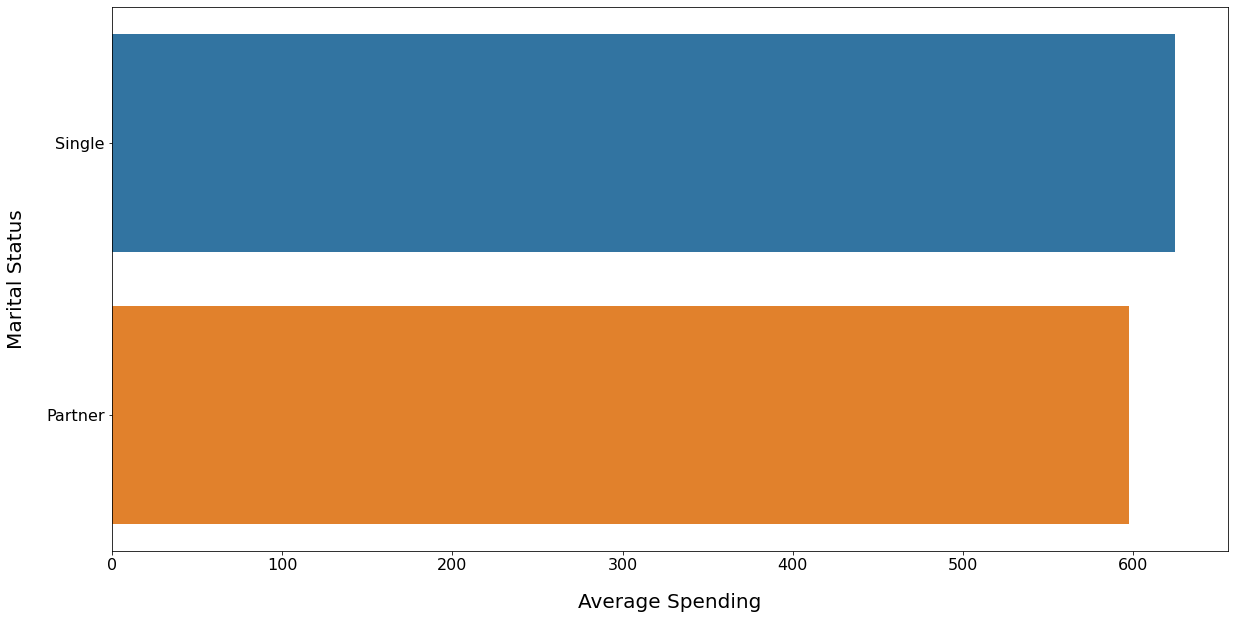

In [26]:
# Marital & Spendings Relationship
maritalspending = df.groupby('Marital_Status')['TotalSpendings'].mean().sort_values(ascending=False)
maritalspending_df = pd.DataFrame(list(maritalspending.items()), columns=['Marital Status', 'Average Spending'])

plt.figure(figsize=(20,10))
sns.barplot(data = maritalspending_df, x="Average Spending", y="Marital Status");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Average Spending', fontsize=20, labelpad=20)
plt.ylabel('Marital Status', fontsize=20, labelpad=20);

Insights : Despite the company have more Partner customer, the Single customer most likely spend more than Partner customer.

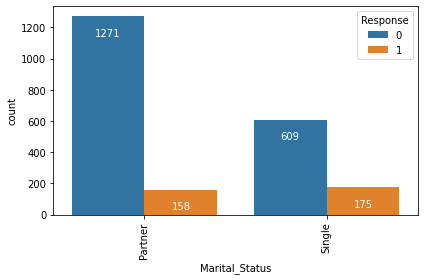

In [27]:
# Marital Status vs Response
ax = sns.countplot(df['Marital_Status'], hue=df['Response'], palette=palette, order = df['Marital_Status'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
plt.xticks(rotation=90)
plt.tight_layout();

Insight : Single have higher chance to respond the campaign than Partner

In [28]:
education = df['Education'].value_counts()

fig = px.pie(education, 
             values = education.values, 
             names = education.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

Insight : Half of the total customer of the company have Graduation degree (1116)

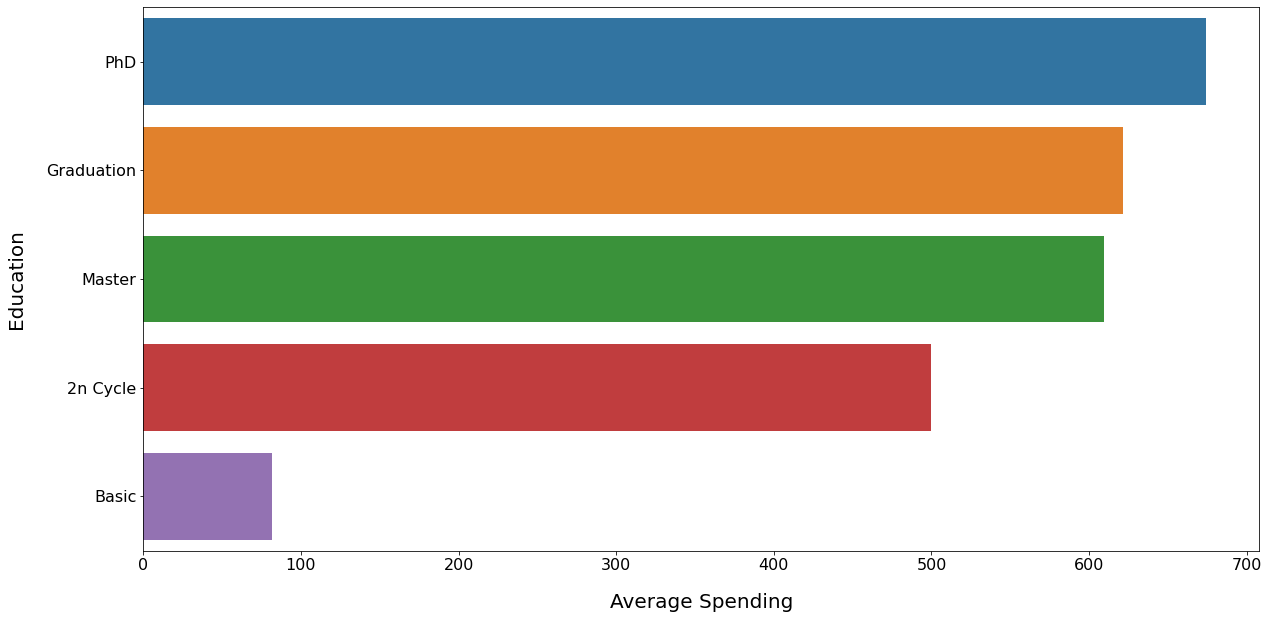

In [29]:
educationspending = df.groupby('Education')['TotalSpendings'].mean().sort_values(ascending=False)
educationspending_df = pd.DataFrame(list(educationspending.items()), columns=['Education', 'Average Spending'])

plt.figure(figsize=(20,10))
sns.barplot(data = educationspending_df, x="Average Spending", y="Education");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Average Spending', fontsize=20, labelpad=20)
plt.ylabel('Education', fontsize=20, labelpad=20);

Insight : Despite half of customer have most number, the average spending of PhD customer are the highest

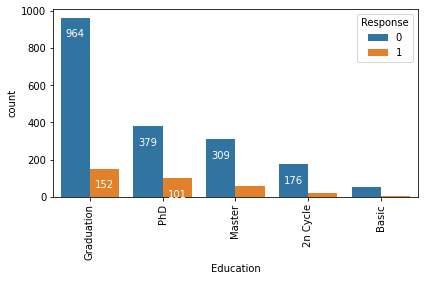

In [30]:
# Education vs Response
ax = sns.countplot(df['Education'], hue=df['Response'], palette=palette, order = df['Education'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
plt.xticks(rotation=90)
plt.tight_layout();

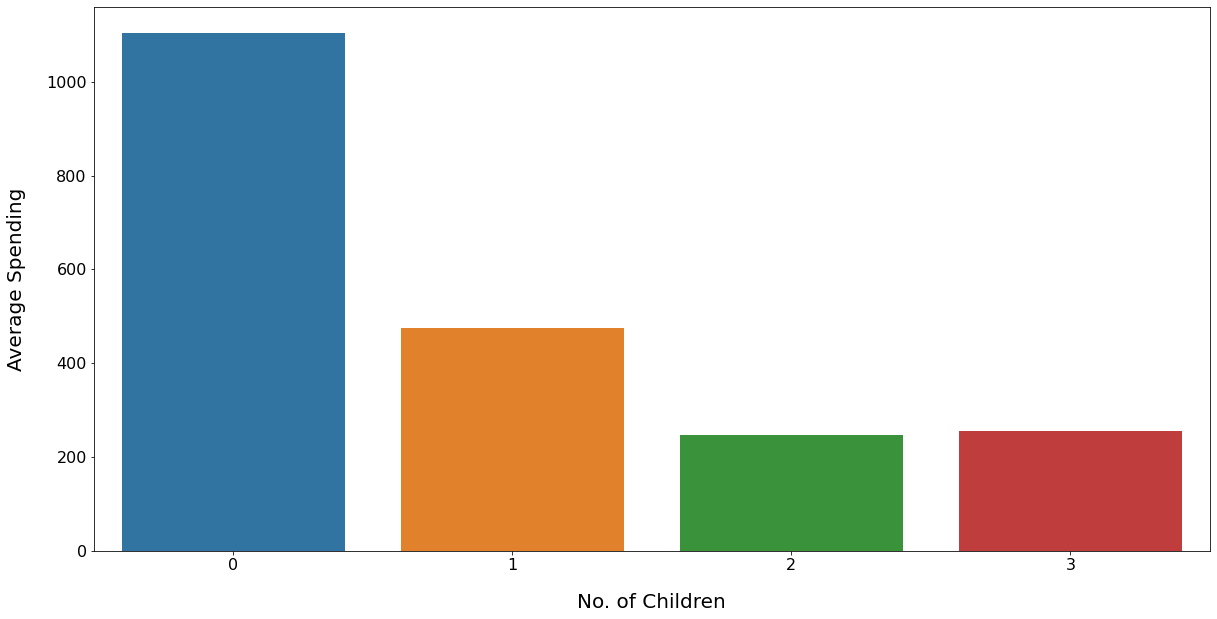

In [31]:
# Children spending
childrenspending = df.groupby('Children')['TotalSpendings'].mean().sort_values(ascending=False)
childrenspending_df = pd.DataFrame(list(childrenspending.items()), columns=['No. of Children', 'Average Spending'])

plt.figure(figsize=(20,10))

sns.barplot(data=childrenspending_df,  x="No. of Children", y="Average Spending");
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('No. of Children', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

Insight : the company have customer with no child highest number above all

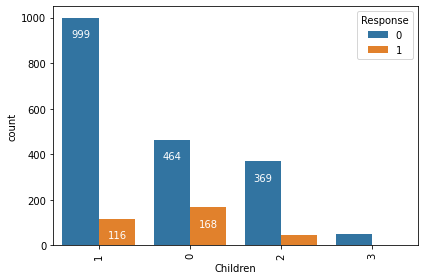

In [32]:
# Children vs Response
ax = sns.countplot(df['Children'], hue=df['Response'], palette=palette, order = df['Children'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
plt.xticks(rotation=90)
plt.tight_layout();

Insight : Customer with no child more likely responding to the campaign

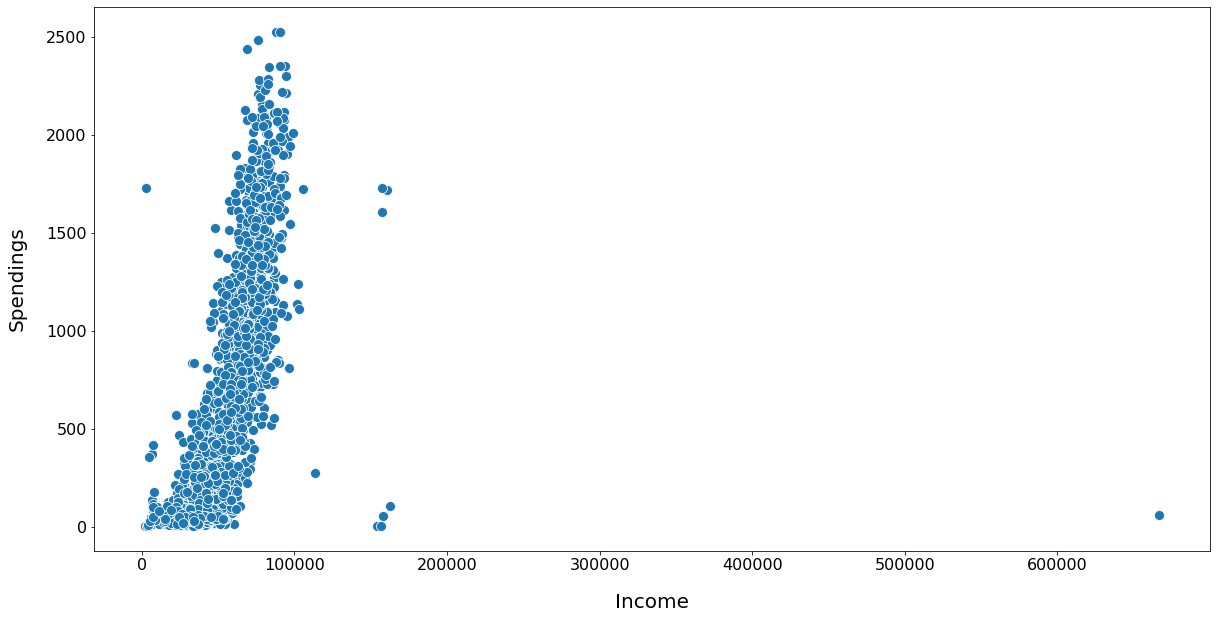

In [33]:
# Income & Spendings relationship
plt.figure(figsize=(20,10))


sns.scatterplot(x=df['Income'], y=df['TotalSpendings'], s=100);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);

Insight : there are positive relationship between Income and Spendings, which is make sense where more income the customer most likely spend their money much more. Also there are outlier on the data where income > 120000 (and one customer with income > 600000)

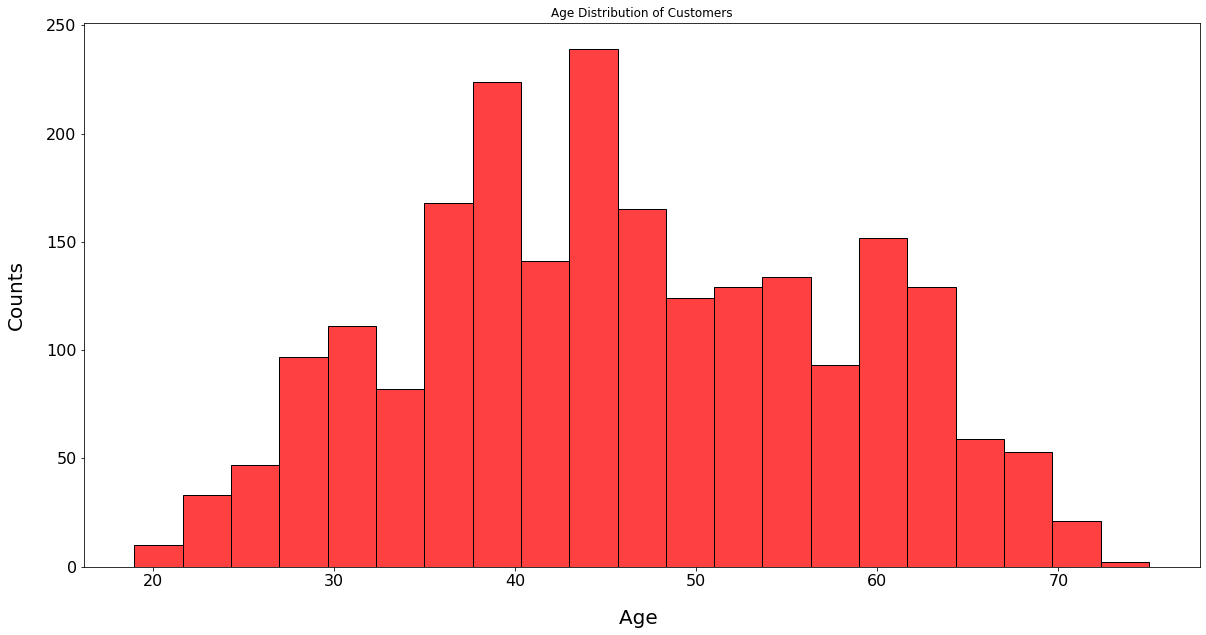

In [34]:
# Age Distribution
plt.figure(figsize=(20,10))
ax = sns.histplot(data = df['Age'], color='red')
ax.set(title = "Age Distribution of Customers");
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age ', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20);

Insight : Customer age distributed normally

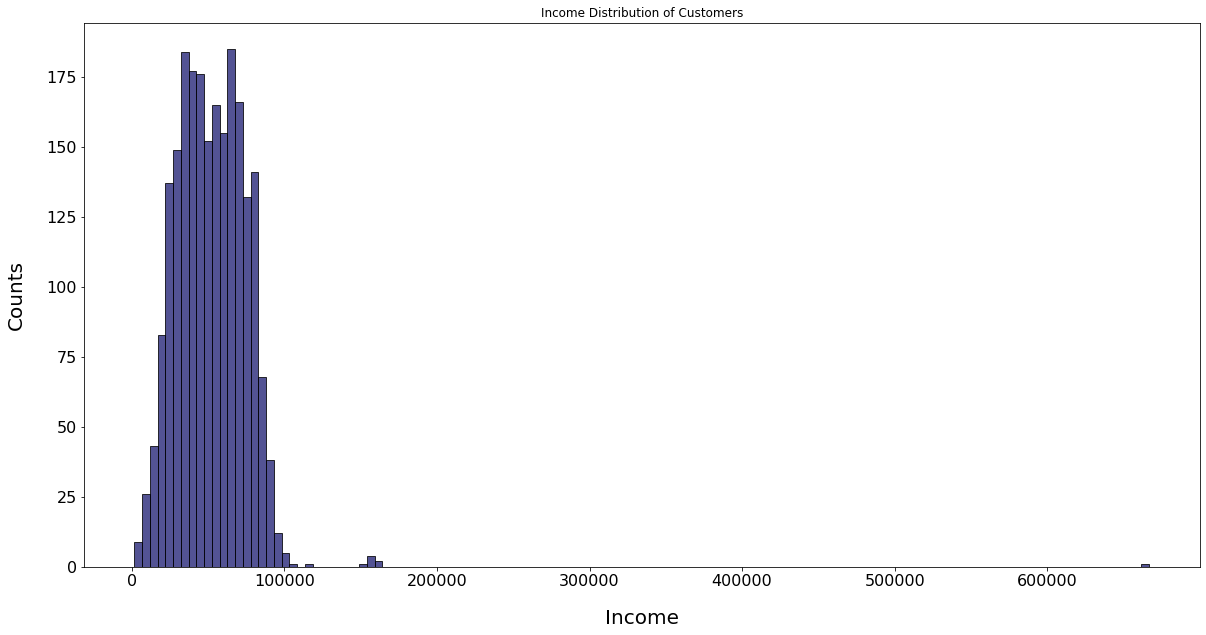

In [35]:
# Income Distribution
plt.figure(figsize=(20, 10))
ax = sns.histplot(data = df['Income'], color = "midnightblue")
ax.set(title = "Income Distribution of Customers");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20);

Insight : Customer income distributed normally, hence there aren't outlier on the data

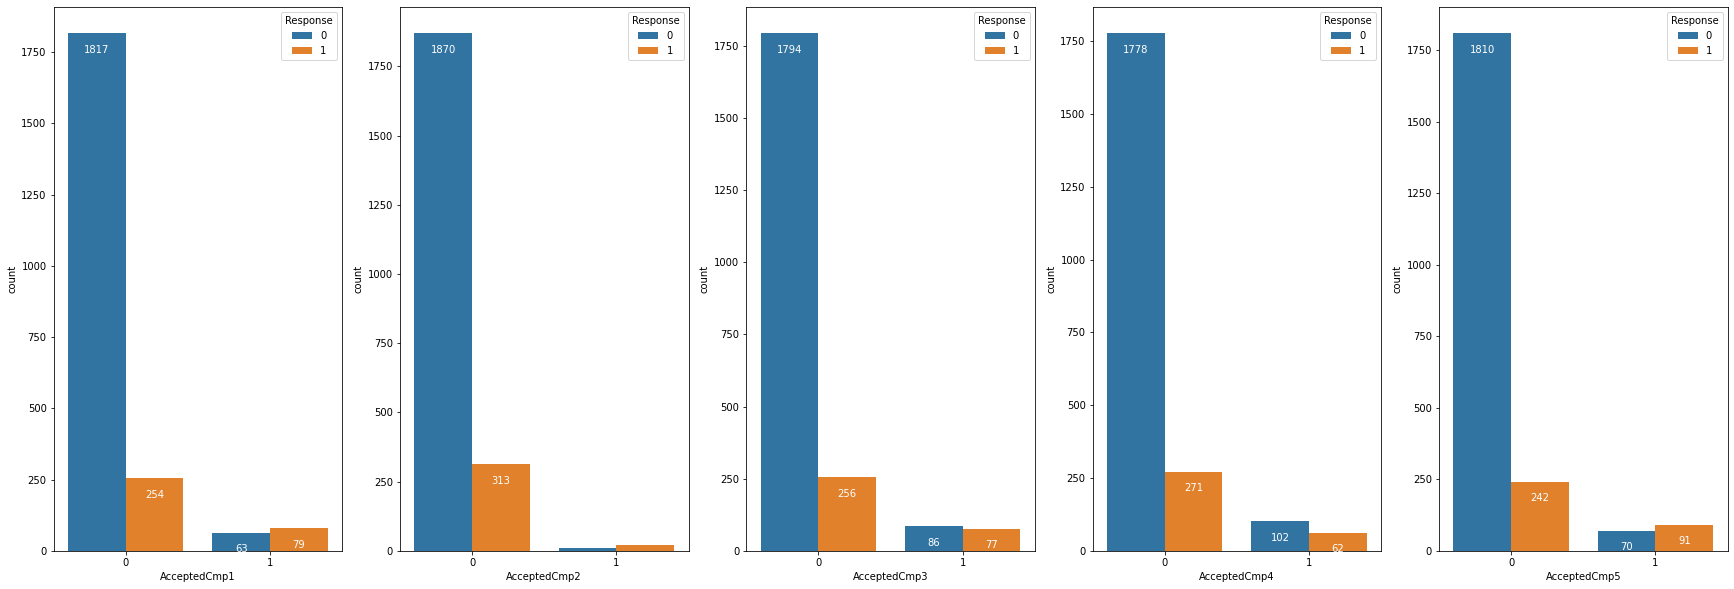

In [36]:
# Find biggest impact campaign
fig, axis = plt.subplots(1,5, figsize=(30, 10))

ax = sns.countplot(df['AcceptedCmp1'], hue=df['Response'], ax=axis[0])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
ax = sns.countplot(df['AcceptedCmp2'], hue=df['Response'], ax=axis[1])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
ax = sns.countplot(df['AcceptedCmp3'], hue=df['Response'], ax=axis[2])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
ax = sns.countplot(df['AcceptedCmp4'], hue=df['Response'], ax=axis[3])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
ax = sns.countplot(df['AcceptedCmp5'], hue=df['Response'], ax=axis[4])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)

Insight : The company did Campaign 4 more than other (164 total customer), hence, the customer more likely to responded for Campaign 5 (91 total customer)

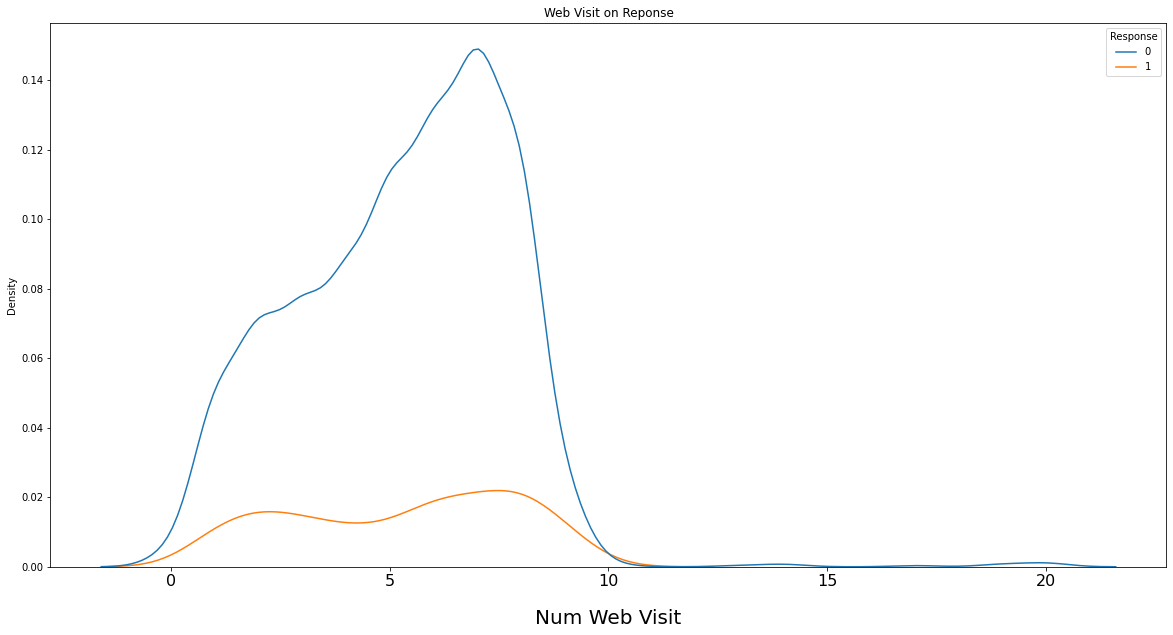

In [37]:
# Web visit density for Response
plt.figure(figsize=(20, 10))
ax = sns.kdeplot(x = df['NumWebVisitsMonth'], hue = df['Response'])
ax.set(title = "Web Visit on Reponse");

plt.xticks( fontsize=16)
plt.xlabel('Num Web Visit', fontsize=20, labelpad=20);

Insight : There is an impact on Num Web Visit on Response, where the more customer visit the website, the more people seem not responding to the campaign

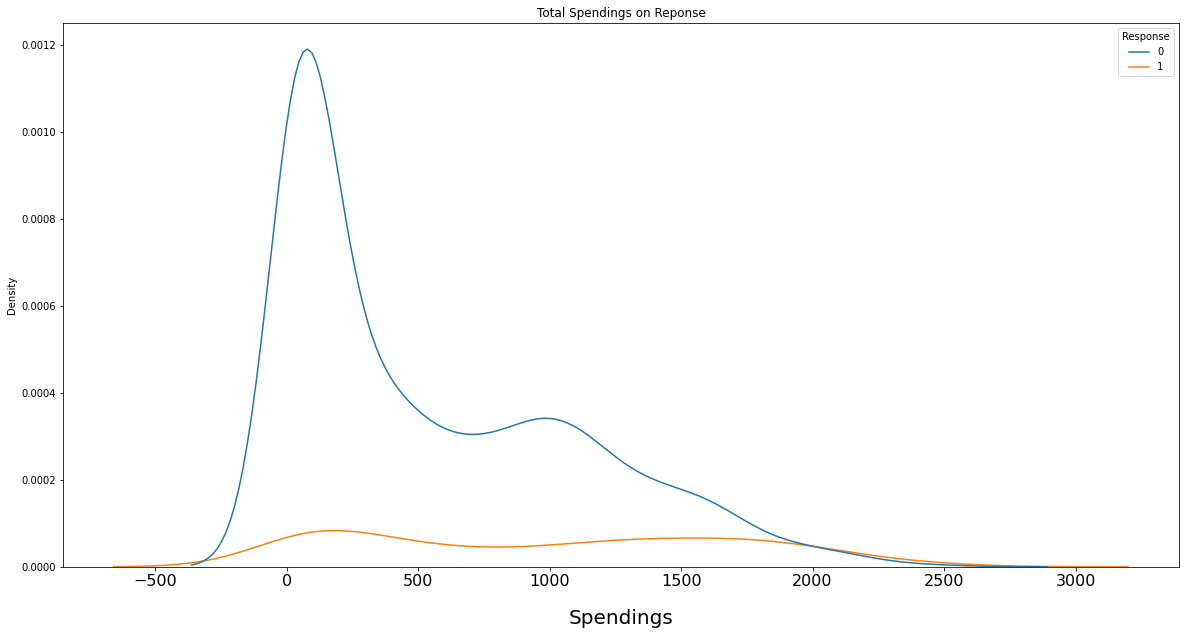

In [38]:
# Total spendings density for Response
plt.figure(figsize=(20, 10))
ax = sns.kdeplot(x = df['TotalSpendings'], hue = df['Response'])
ax.set(title = "Total Spendings on Reponse");

plt.xticks( fontsize=16)
plt.xlabel('Spendings', fontsize=20, labelpad=20);

Insight : From the plot, we know that the more customer spendings for the company, the customer more likely responded to the campaign

From all of the EDA, we can pull out the summary :

Single customer have higher chance to respond the campaign than the customer who have married or have couple
Customer from Graduation degree of Education, have more likely to responding for the campaign and give profit to the company
Customer with no children at home (despite Partner or Single) have responding to the campaign more often than customer with children
The campaign number 5 have more number of Responding people than not
The more user visit on the website the more people not response to the campaign. This could be a problem because that means there is something wrong with our website
The more user spends on the company, people have a higher chance to respond the campaign. This is somehow make sense because if the people have more spending to the company the more likely that customer is loyal and didn't need any campaign
Then we can produce a customer persona where the people that higher chance to respond the campaign is :

Single
Graduation degree of Education
No children at home
Little time visits on the website
Little spends on the company
Which is these characteristic somehow match new customer, busy customer, or promo hunter customer. Where these customer mostly will response to campaign. And maybe we could use campaign 5 more often because of the impact for the customer.

# **Encoding & Resampling**

# Encoding

In [39]:
# Marital_Status encoding
# Change to 1 for all value with partner (Together and Maried) and 0 for all value without partner (Single, Divorced, Widow, Alone, Absurd, YOLO)

df['Marital_Status'] = df['Marital_Status'].replace({'Partner': 1,'Single': 0})

In [40]:
# Education encoding
# Change to 0 for all first cycle ed (Basic & Graduation), 1 for second cycle (Master, 2n Cycle), 2 for third cycle (PhD)
# Source : https://www.studera.nu/startpage/higher-education-studies/higher-education-in-sweden/study-levels-and-degrees/#:~:text=First%20cycle%20is%20for%20the,offered%20at%20all%20three%20cycles

df['Education'] = df['Education'].replace({'Basic': 0,
                                           'Graduation': 0,
                                           'Master': 1,
                                           '2n Cycle': 1,
                                           'PhD': 2})

# Resampling

In [41]:
# Assign 'Response' column to y 
y = df['Response'].values
# Assign all columns except 'Response' to X
X = df.drop(['Response'], axis = 1).values

In [42]:
# Check dimension
print('X shape :', X.shape)
print('y shape :', y.shape)

X shape : (2213, 15)
y shape : (2213,)


In [43]:
# split data to train and test data
# with test size is 30% of overall data
# use stratified sampling
# and set RNG to 1000
X_train_response, X_test_response, y_train_response, y_test_response = train_test_split(
    X,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 1000
)

In [44]:
# Make a new dataframe using train & test data
train_df_x = pd.DataFrame(X_train_response, columns=df.drop(['Response'], axis = 1).columns)
train_df_y = pd.DataFrame(y_train_response, columns=["Response"])
train_df = pd.concat([train_df_x, train_df_y], axis=1)

test_df_x = pd.DataFrame(X_test_response, columns=df.drop(['Response'], axis = 1).columns)
test_df_y = pd.DataFrame(y_test_response, columns=["Response"])
test_df = pd.concat([test_df_x, test_df_y], axis=1)

In [45]:
train_df

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,Children,TotalSpendings,TotalPurchases,Response
0,0.0,0.0,63810.0,45.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,49.0,1.0,1371.0,19.0,0
1,0.0,1.0,82427.0,35.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,49.0,0.0,1456.0,20.0,0
2,0.0,1.0,51651.0,32.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,1.0,433.0,13.0,0
3,1.0,1.0,69661.0,80.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,0.0,834.0,22.0,0
4,0.0,0.0,34176.0,12.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,1.0,89.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,2.0,0.0,47025.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,2.0,20.0,3.0,0
1545,0.0,1.0,34600.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,2.0,318.0,12.0,1
1546,0.0,1.0,18793.0,14.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,1.0,77.0,6.0,0
1547,1.0,1.0,23148.0,83.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,37.0,5.0,0


In [46]:
test_df

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,Children,TotalSpendings,TotalPurchases,Response
0,2.0,0.0,49667.0,35.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,1396.0,20.0,1
1,0.0,1.0,61014.0,17.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,1147.0,16.0,0
2,1.0,1.0,90226.0,26.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,59.0,0.0,2352.0,23.0,0
3,0.0,0.0,93790.0,16.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,45.0,0.0,2349.0,25.0,1
4,2.0,1.0,54549.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,1.0,233.0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,0.0,0.0,79244.0,58.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,22.0,0.0,1216.0,21.0,1
660,2.0,1.0,68682.0,56.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,1598.0,23.0,0
661,2.0,1.0,30396.0,22.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,46.0,1.0,34.0,4.0,1
662,1.0,1.0,35178.0,10.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,44.0,1.0,59.0,4.0,1


# **Pre-processing**

**Outlier Handling**

From EDA we know that there is outlier on Income and Spendings, we need to remove the outlier from these features

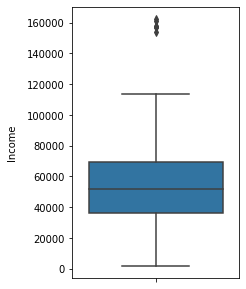

In [47]:
# Checking train_df income outlier
plt.figure(figsize=(3,5))
sns.boxplot(y=train_df['Income']);
plt.ylabel('Income', fontsize=10, labelpad=10);

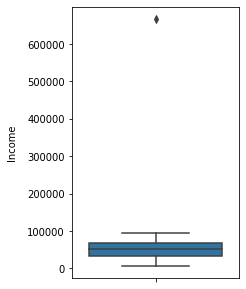

In [48]:
# Checking train_df income outlier
plt.figure(figsize=(3,5))
sns.boxplot(y=test_df['Income']);
plt.ylabel('Income', fontsize=10, labelpad=10);

In [62]:
# Remove outlier on both dataset
train_df = train_df[train_df['Income'] < 120000]

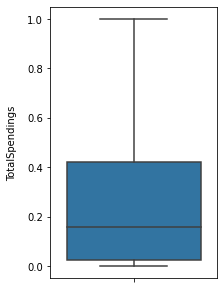

In [63]:
# Checking train_df spendings outlier
plt.figure(figsize=(3,5))
sns.boxplot(y=train_df['TotalSpendings']);
plt.ylabel('TotalSpendings', fontsize=10, labelpad=10);

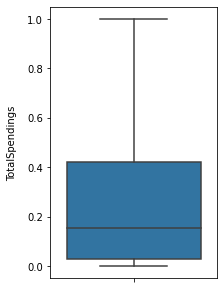

In [64]:
# Checking test_df spendings outlier
plt.figure(figsize=(3,5))
sns.boxplot(y=test_df['TotalSpendings']);
plt.ylabel('TotalSpendings', fontsize=10, labelpad=10);

In [65]:
# Remove outlier on test dataset
train_df = test_df[test_df['TotalSpendings'] < 2400]

# **Normalization**

Also, there is some feature that have numerical feature with high value. For these we will use normalization to tranform the feature into 0~1 range

In [66]:
# Transform data using normalization
col_trans = df.columns
scaler = MinMaxScaler()
train_df[col_trans] = scaler.fit(train_df).transform(train_df[col_trans])
test_df[col_trans] = scaler.transform(train_df[col_trans])

In [67]:
# Check train df
train_df

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,Children,TotalSpendings,TotalPurchases,Response
0,1.0,0.0,0.484517,0.353535,0.368421,1.0,0.0,0.0,0.0,0.0,0.0,0.773585,0.000000,0.592150,0.612903,1.0
1,0.0,1.0,0.612056,0.171717,0.315789,0.0,0.0,0.0,0.0,0.0,0.0,0.301887,0.333333,0.485922,0.483871,0.0
2,0.5,1.0,0.940395,0.262626,0.052632,0.0,0.0,0.0,1.0,0.0,0.0,0.754717,0.000000,1.000000,0.709677,0.0
3,0.0,0.0,0.980454,0.161616,0.052632,0.0,1.0,1.0,1.0,0.0,0.0,0.490566,0.000000,0.998720,0.774194,1.0
4,1.0,1.0,0.539390,0.080808,0.315789,0.0,0.0,0.0,0.0,0.0,0.0,0.830189,0.333333,0.095990,0.290323,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,0.0,0.0,0.816959,0.585859,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.056604,0.000000,0.515358,0.645161,1.0
660,1.0,1.0,0.698243,0.565657,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.094340,0.000000,0.678328,0.709677,0.0
661,1.0,1.0,0.267914,0.222222,0.315789,1.0,0.0,0.0,0.0,0.0,0.0,0.509434,0.333333,0.011092,0.096774,1.0
662,0.5,1.0,0.321663,0.101010,0.315789,1.0,0.0,0.0,0.0,0.0,0.0,0.471698,0.333333,0.021758,0.096774,1.0


In [68]:
# Check descriptive stats for train df
train_df.describe()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,Children,TotalSpendings,TotalPurchases,Response
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,0.346677,0.622356,0.498455,0.473634,0.225871,0.072508,0.066465,0.066465,0.064955,0.015106,0.016616,0.504703,0.311682,0.243876,0.360589,0.149547
std,0.397016,0.485164,0.227038,0.286650,0.126139,0.259523,0.249282,0.249282,0.246632,0.122066,0.127925,0.226672,0.251473,0.248732,0.224401,0.356896
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.311420,0.232323,0.157895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339623,0.000000,0.026451,0.161290,0.000000
50%,0.000000,1.000000,0.496431,0.474747,0.263158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.490566,0.333333,0.154224,0.322581,0.000000
75%,0.500000,1.000000,0.676918,0.727273,0.315789,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.679245,0.333333,0.422462,0.548387,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
# Check test df
test_df

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,Children,TotalSpendings,TotalPurchases,Response
0,1.0,0.0,0.484517,0.353535,0.368421,1.0,0.0,0.0,0.0,0.0,0.0,0.773585,0.000000,0.592150,0.612903,1.0
1,0.0,1.0,0.612056,0.171717,0.315789,0.0,0.0,0.0,0.0,0.0,0.0,0.301887,0.333333,0.485922,0.483871,0.0
2,0.5,1.0,0.940395,0.262626,0.052632,0.0,0.0,0.0,1.0,0.0,0.0,0.754717,0.000000,1.000000,0.709677,0.0
3,0.0,0.0,0.980454,0.161616,0.052632,0.0,1.0,1.0,1.0,0.0,0.0,0.490566,0.000000,0.998720,0.774194,1.0
4,1.0,1.0,0.539390,0.080808,0.315789,0.0,0.0,0.0,0.0,0.0,0.0,0.830189,0.333333,0.095990,0.290323,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,0.0,0.0,0.816959,0.585859,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.056604,0.000000,0.515358,0.645161,1.0
660,1.0,1.0,0.698243,0.565657,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.094340,0.000000,0.678328,0.709677,0.0
661,1.0,1.0,0.267914,0.222222,0.315789,1.0,0.0,0.0,0.0,0.0,0.0,0.509434,0.333333,0.011092,0.096774,1.0
662,0.5,1.0,0.321663,0.101010,0.315789,1.0,0.0,0.0,0.0,0.0,0.0,0.471698,0.333333,0.021758,0.096774,1.0


In [70]:
# Check descriptive stats for test df
test_df.describe()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,Children,TotalSpendings,TotalPurchases,Response
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,0.346677,0.622356,0.498455,0.473634,0.225871,0.072508,0.066465,0.066465,0.064955,0.015106,0.016616,0.504703,0.311682,0.243876,0.360589,0.149547
std,0.397016,0.485164,0.227038,0.286650,0.126139,0.259523,0.249282,0.249282,0.246632,0.122066,0.127925,0.226672,0.251473,0.248732,0.224401,0.356896
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.311420,0.232323,0.157895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339623,0.000000,0.026451,0.161290,0.000000
50%,0.000000,1.000000,0.496431,0.474747,0.263158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.490566,0.333333,0.154224,0.322581,0.000000
75%,0.500000,1.000000,0.676918,0.727273,0.315789,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.679245,0.333333,0.422462,0.548387,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
# Reseparate independent and dependent feature of the train-test df
X_train_response = train_df.drop(['Response'], axis=1)
y_train_response = train_df['Response']

X_test_response = test_df.drop(['Response'], axis=1)
y_test_response = test_df['Response']

## **Model Selection**

For this chance, we would like to select model from three basic models (LogisticRegression,DecisionTree, and RuleFit)

In [72]:
var_name = X_train_response.columns
var_name

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Age', 'Children', 'TotalSpendings',
       'TotalPurchases'],
      dtype='object')

In [82]:
def create_models(seed=1000):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    '''

    models = []
    models.append(('Logistic Regression', LogisticRegression(random_state=seed)))
    models.append(('KNN',  KNeighborsClassifier(n_neighbors = 3)))
    models.append(('Decision Tree', DecisionTreeClassifier(random_state=seed, max_depth = 5)))
    models.append(('RuleFit', SkopeRules(random_state=seed, n_estimators = 10, max_features = 'sqrt', feature_names = var_name)))
    models.append(('Random Forest', RandomForestClassifier(random_state = seed,n_estimators=100)))
    models.append(('Multi-Layered Perceptron', MLPClassifier(random_state = seed,hidden_layer_sizes = (8,),solver = 'sgd')))
    models.append(('XGBoost', XGBClassifier(random_state = seed)))
    
    return models

# create a list with all the algorithms we are going to assess
models = create_models()

In [83]:
# test the F1 Score of each model using default hyperparameters
results = []
names = []
scoring = 'F1 Score'
for name, model in models:
    # fit the model with the training data
    model.fit(X_train_response, y_train_response).predict(X_test_response)
    # make predictions with the testing data
    predictions = model.predict(X_test_response)
    # calculate f1_score 
    f1score = f1_score(y_test_response, predictions)
    # append the model name and the F1 Score to the lists
    results.append(f1score)
    names.append(name)
    # print classifier F1 Score
    print('Classifier: {}, F1 Score: {})'.format(name, f1score))

Classifier: Logistic Regression, F1 Score: 0.3795620437956205)
Classifier: KNN, F1 Score: 0.5714285714285715)
Classifier: Decision Tree, F1 Score: 0.6394557823129252)
Classifier: RuleFit, F1 Score: 0.5196078431372548)
Classifier: Random Forest, F1 Score: 1.0)
Classifier: Multi-Layered Perceptron, F1 Score: 0.0)
Classifier: XGBoost, F1 Score: 0.7215189873417721)


In [84]:
for name,model in models:
  model.fit(X_train_response, y_train_response).predict(X_test_response)
  predictions = model.predict(X_test_response)
  print('='*75)
  print('Classifier: {}'.format(name))
  print(pd.DataFrame(metrics.classification_report(y_test_response, predictions, target_names=['not response','response'], output_dict=True)))

Classifier: Logistic Regression
           not response   response  accuracy   macro avg  weighted avg
precision      0.883013   0.684211  0.871601    0.783612      0.853283
recall         0.978686   0.262626  0.871601    0.620656      0.871601
f1-score       0.928391   0.379562  0.871601    0.653976      0.846315
support      563.000000  99.000000  0.871601  662.000000    662.000000
Classifier: KNN
           not response   response  accuracy   macro avg  weighted avg
precision      0.913997   0.695652  0.891239    0.804824      0.881344
recall         0.962700   0.484848  0.891239    0.723774      0.891239
f1-score       0.937716   0.571429  0.891239    0.754572      0.882939
support      563.000000  99.000000  0.891239  662.000000    662.000000
Classifier: Decision Tree
           not response   response  accuracy   macro avg  weighted avg
precision      0.915309   0.979167   0.91994    0.947238      0.924859
recall         0.998224   0.474747   0.91994    0.736486      0.919940
f1-

From the summary we got, we will choose RandomForest for our model. The reason is that the RandomForest have higher f1 score, which is suitable for imbalance dataset, among all the basic models (Logistic Regression, Decision Tree, RuleFit) and complex models (Random Forest, Multi-Layered Perceptron, XGBoost)

# **Modelling**

# Modelling with best model

In [94]:
# define XGBoost regression model
randomforest = RandomForestClassifier(random_state = 100)
# fit model to data
randomforest.fit(X_train_response, y_train_response)

RandomForestClassifier(random_state=100)

# Model Evaluation

In [95]:
# predict
pred_result = randomforest.predict(X_test_response)
pred_proba_result = randomforest.predict_proba(X_test_response)

In [96]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test_response, pred_result, target_names=['not response','response'], output_dict=True))

,not response,response,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,563.0,99.0,1.0,662.0,662.0


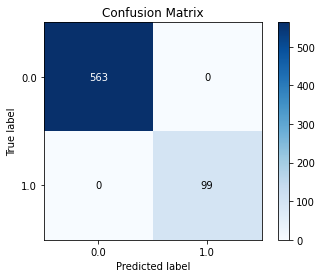

In [97]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test_response, pred_result);

The confusion matrix show :

The model predicted response and the customer actually response is 99 (True Positive)
The model predicted not response and the customer actually response is 0 (False Negative)
The model predicted response and the customer actually not response is 0 (False Positive)
The model predicted not response and the customer actually not response is 563 (True Negative)

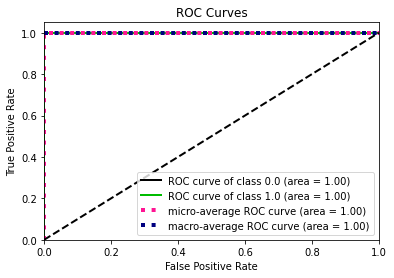

In [98]:
# check ROC-AUC curve and result
skplt.metrics.plot_roc_curve(y_test_response, pred_proba_result);

The model succeed to distinct between True Positive and True Negative with chance 100%

In [99]:
# check f1-score
metrics.f1_score(y_test_response, pred_result)

1.0

The harmony between precision and recall score of the best model is 100%

# **Model Interpretation**

In [105]:
## initiate explainer for XGBoost model
response_RF_exp = dx.Explainer(randomforest, X_train_response, y_train_response, label = "RF Interpretation")

Preparation of a new explainer is initiated

  -> data              : 662 rows 15 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 662 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : RF Interpretation
  -> predict function  : <function yhat_proba_default at 0x7f440f8ce200> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.148, max = 0.91
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.33, mean = 0.00151, max = 0.44
  -> model_info        : package sklearn

A new explainer has been created!


In [106]:
# visualize permutation feature importance for RandomForest model
response_RF_exp.model_parts().plot()

From the plot above, we know that 5 highest importance variable is  Recency, AcceptedCmp3, NumWebVisitsMonth,, Income, TotalSpendings. This is make sense because from what we get at exploratory model analysis, these feature have high impact to determine customer Response.

In [107]:
# create partial dependence plot of XGBoost model
response_RF_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 15/15 [00:05<00:00,  2.92it/s]
